In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("data\\data.xlsx")
df = df[df["LMTD"] > 0]
df = df[df["LA Chilling Duty"] >= 0]
df["SCD (MJ/kg)"] = (0.001 * df["LA Chilling Duty"]) / df["Captured CO2 (kg/h)"]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from joblib import dump, load

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [5]:
XA = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]
XN = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency']]
y = df[["SRD (MJ/kg CO2)", "Condensor Specific Duty", "SCD (MJ/kg)"]]

In [6]:
XA_train, XA_test, y_train, y_test = train_test_split(XA, y, test_size=0.30, random_state=211)
XN_train, XN_test, y_train, y_test = train_test_split(XN, y, test_size=0.30, random_state=211)

In [7]:
max_estimators=800 # The maximum degree we would like to test
RMSE_of_models=[]

for n in range(30, max_estimators, 20):
    model = RandomForestRegressor(n_estimators=n, warm_start=True, n_jobs=-1, random_state=211)
    scores = cross_val_score(model, XA_train, y_train['SRD (MJ/kg CO2)'], cv=5, scoring='neg_mean_squared_error', n_jobs= -1)
    rmse = np.sqrt(np.abs(scores)).mean()
    RMSE_of_models.append(rmse)

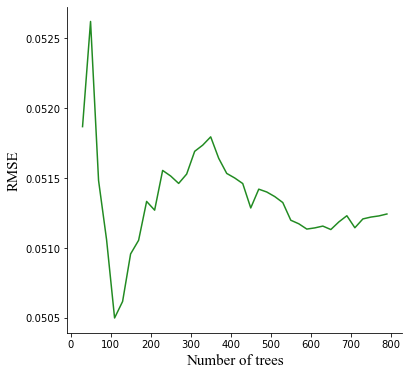

In [21]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(30, max_estimators, 20),RMSE_of_models, color="forestgreen")
ax.set_xlabel('Number of trees',fontsize=15,fontname="Times New Roman")
ax.set_ylabel('RMSE',fontsize=15,fontname="Times New Roman")
ax.spines[['top', 'right']].set_visible(False)
plt.savefig('Figures\\RFHP.png', dpi=600, bbox_inches='tight')

In [10]:
param_grid = {'n_estimators': [60, 70, 80, 90, 100, 110, 120, 150, 180, 250, 600],
              'max_depth': [6, 8, 10, 15, 20, 30, None],
              'max_features': [4, 6, 8, None]
             }

In [11]:
rf = RandomForestRegressor(n_jobs=-1, random_state=211)

In [12]:
rfmodel = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [13]:
rfmodel.fit(XA_train, y_train['SRD (MJ/kg CO2)'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=211),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 15, 20, 30, None],
                         'max_features': [4, 6, 8, None],
                         'n_estimators': [60, 70, 80, 90, 100, 110, 120, 150,
                                          180, 250, 600]},
             scoring='neg_mean_squared_error')

In [14]:
rfmodel.best_params_

{'max_depth': 20, 'max_features': 6, 'n_estimators': 600}

In [15]:
rfmodel.best_score_

-0.002048765972391531